In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/281 Project/fracture-classification'

/content/drive/MyDrive/281 Project/fracture-classification


In [ ]:
!python main.py run-data-pipeline

Traceback (most recent call last):
  File "/content/drive/.shortcut-targets-by-id/1QDpknqa5EM_1MnUF0YN7Bs9waoafcatA/281 Project/fracture-classification/scripts/load_data.py", line 5, in <module>

Aborted!


In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
#load all npy file folders
data_root = 'data/'
images_folder = data_root + 'images/'
hog_folder = data_root + 'hog/'
contours_folder = data_root + 'contours/'
canny_folder = data_root + 'canny_edges/'

#load images
images_test = np.load(images_folder + 'images_test.npy')
images_train = np.load(images_folder + 'images_train.npy')
images_val = np.load(images_folder + 'images_val.npy')

#flatten images
images_train_num = images_train.shape[0]
images_train_flatten = images_train.reshape(images_train_num, -1)
images_val_num = images_val.shape[0]
images_val_flatten = images_val.reshape(images_val_num, -1)
images_test_num = images_test.shape[0]
images_test_flatten = images_test.reshape(images_test_num, -1)

#load labels and label ids
label_ids_test = np.load(images_folder + 'label_ids_test.npy')
label_ids_train = np.load(images_folder + 'label_ids_train.npy')
label_ids_val = np.load(images_folder + 'label_ids_val.npy')
labels_test = np.load(images_folder + 'labels_test.npy')
labels_train = np.load(images_folder + 'labels_train.npy')
labels_val = np.load(images_folder + 'labels_val.npy')

#load HOG
hog_test = np.load(hog_folder + 'hog_test.npy')
hog_train = np.load(hog_folder + 'hog_train.npy')
hog_val = np.load(hog_folder + 'hog_val.npy')

#flatten HOG
hog_train_num = hog_train.shape[0]
hog_train_flatten = hog_train.reshape(hog_train_num, -1)
hog_val_num = hog_val.shape[0]
hog_val_flatten = hog_val.reshape(hog_val_num, -1)
hog_test_num = hog_test.shape[0]
hog_test_flatten = hog_test.reshape(hog_test_num, -1)

#load contours
contours_test = np.load(contours_folder + 'contours_test.npy')
contours_train = np.load(contours_folder + 'contours_train.npy')
contours_val = np.load(contours_folder + 'contours_val.npy')

#flatten contours
contours_train_num = contours_train.shape[0]
contours_train_flatten = contours_train.reshape(contours_train_num, -1)
contours_val_num = contours_val.shape[0]
contours_val_flatten = contours_val.reshape(contours_val_num, -1)
contours_test_num = contours_test.shape[0]
contours_test_flatten = contours_test.reshape(contours_test_num, -1)

#load canny edges
canny_test = np.load(canny_folder + 'canny_edges_test.npy')
canny_train = np.load(canny_folder + 'canny_edges_train.npy')
canny_val = np.load(canny_folder + 'canny_edges_val.npy')

#flatten canny edges
canny_train_num = canny_train.shape[0]
canny_train_flatten = canny_train.reshape(canny_train_num, -1)
canny_val_num = canny_val.shape[0]
canny_val_flatten = canny_val.reshape(canny_val_num, -1)
canny_test_num = canny_test.shape[0]
canny_test_flatten = canny_test.reshape(canny_test_num, -1)

In [7]:
class_lookup = list(set(zip(label_ids_train, labels_train)))
class_lookup = {id_value: class_value for id_value, class_value in class_lookup}
class_lookup
print(class_lookup)
label_names = list(class_lookup.values())
print(label_names)

{8: 'impacted', 9: 'avulsion', 5: 'pathological', 6: 'longitudinal', 4: 'dislocation', 7: 'oblique', 0: 'hairline', 2: 'greenstick', 1: 'spiral', 3: 'comminuted'}
['impacted', 'avulsion', 'pathological', 'longitudinal', 'dislocation', 'oblique', 'hairline', 'greenstick', 'spiral', 'comminuted']


In [8]:
#concatenate features
X_train_combined = np.hstack((images_train_flatten, hog_train_flatten, contours_train_flatten, canny_train_flatten))
X_val_combined = np.hstack((images_val_flatten, hog_val_flatten, contours_val_flatten, canny_val_flatten))
X_test_combined = np.hstack((images_test_flatten, hog_test_flatten, contours_test_flatten, canny_test_flatten))

In [13]:
model = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs').fit(X_train_combined, label_ids_train)

In [14]:
def show_confusion_matrix(confusion_matrix):
  ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                  xticklabels=label_names, yticklabels=label_names, cbar=False)

  # Add axis labels.
  ax.set(xlabel='Predicted Label', ylabel='True Label')
  plt.show()

  #code to calculate precision for each class
  precision = [] #array to store precision for each label

  #loop to calculate precision for each class and add to precision array
  for i in range(len(label_names)):
      true_pos = confusion_matrix[i,i]
      false_pos = sum(confusion_matrix[:,i]) - true_pos
      precision.append(true_pos / (true_pos + false_pos))

  #print precision for each class
  for i, j in enumerate(label_names):
      print("Label: ", j)
      print("Precision: ", precision[i])

Validation Accuracy: 0.3434
Test Accuracy: 0.2429
Validation Confusion Matrix:


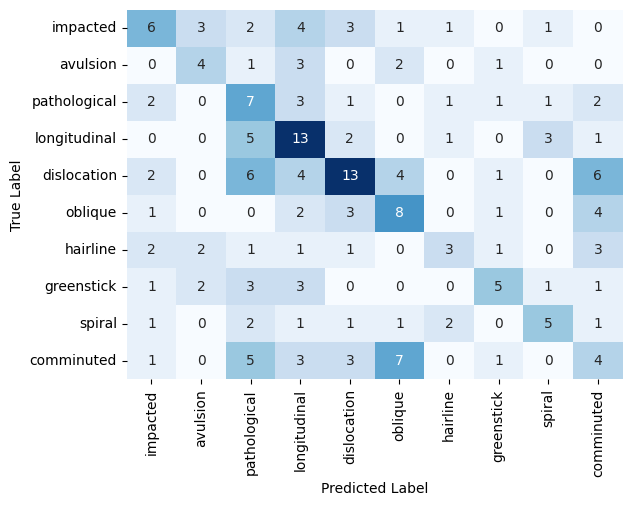

Label:  impacted
Precision:  0.375
Label:  avulsion
Precision:  0.36363636363636365
Label:  pathological
Precision:  0.21875
Label:  longitudinal
Precision:  0.35135135135135137
Label:  dislocation
Precision:  0.48148148148148145
Label:  oblique
Precision:  0.34782608695652173
Label:  hairline
Precision:  0.375
Label:  greenstick
Precision:  0.45454545454545453
Label:  spiral
Precision:  0.45454545454545453
Label:  comminuted
Precision:  0.18181818181818182
Test Confusion Matrix:


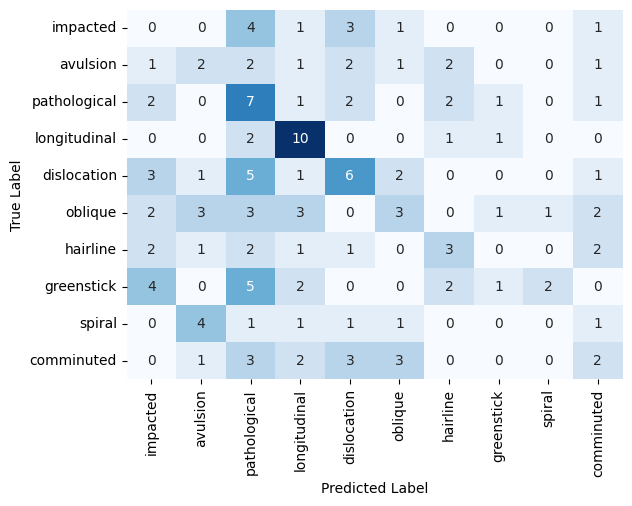

Label:  impacted
Precision:  0.0
Label:  avulsion
Precision:  0.16666666666666666
Label:  pathological
Precision:  0.20588235294117646
Label:  longitudinal
Precision:  0.43478260869565216
Label:  dislocation
Precision:  0.3333333333333333
Label:  oblique
Precision:  0.2727272727272727
Label:  hairline
Precision:  0.3
Label:  greenstick
Precision:  0.25
Label:  spiral
Precision:  0.0
Label:  comminuted
Precision:  0.18181818181818182
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.29      0.32        21
           1       0.36      0.36      0.36        11
           2       0.22      0.39      0.28        18
           3       0.35      0.52      0.42        25
           4       0.48      0.36      0.41        36
           5       0.35      0.42      0.38        19
           6       0.38      0.21      0.27        14
           7       0.45      0.31      0.37        16
           8       0.45      0.36      0.4

In [15]:
# Predict on validation and test sets
y_val_pred = model.predict(X_val_combined)
y_test_pred = model.predict(X_test_combined)

# Evaluate accuracy
val_accuracy = accuracy_score(label_ids_val, y_val_pred)
test_accuracy = accuracy_score(label_ids_test, y_test_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

#Confusion matrix
print('Validation Confusion Matrix:')
val_confusion_matrix = confusion_matrix(label_ids_val, y_val_pred)
show_confusion_matrix(val_confusion_matrix)

print('Test Confusion Matrix:')
test_confusion_matrix = confusion_matrix(label_ids_test, y_test_pred)
show_confusion_matrix(test_confusion_matrix)

# Detailed classification report
print('Validation Classification Report:')
print(classification_report(label_ids_val, y_val_pred))

print('Test Classification Report:')
print(classification_report(label_ids_test, y_test_pred))